In [57]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats

 1.	Загрузить файл hr.csv (можно найти во сложении к заданию)

In [58]:
data = pd.read_csv('HR.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [59]:
# смотрю сколько в датасете остутвующих значений
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [60]:
# смотрю параметры датасета и какие данные в нем есть
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


 2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [61]:
# с помощью функции describe() рассчиываю для датасета: среднее значение/mean, стандартное отклонение/std, 
# минимальное значение/min, медиану/50%, максимальное значение/max   
np.round(data.describe(), decimals=2) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [62]:
print('Значения моды для переменных датасета')
np.round_(data.mode(), decimals=2)

Значения моды для переменных датасета


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# У переменной average_montly_hours получилось две моды (2 одинаковых наиболее часто встречающихся значения): 135 и 156, 
# ещe раз проверяю так ли это
data['average_montly_hours'].value_counts()

156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64

 3.	Рассчитать и визуализировать корреляционную матрицу для переменных

In [15]:
corr_ = np.round_(data.corr(), decimals=2)
corr_

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


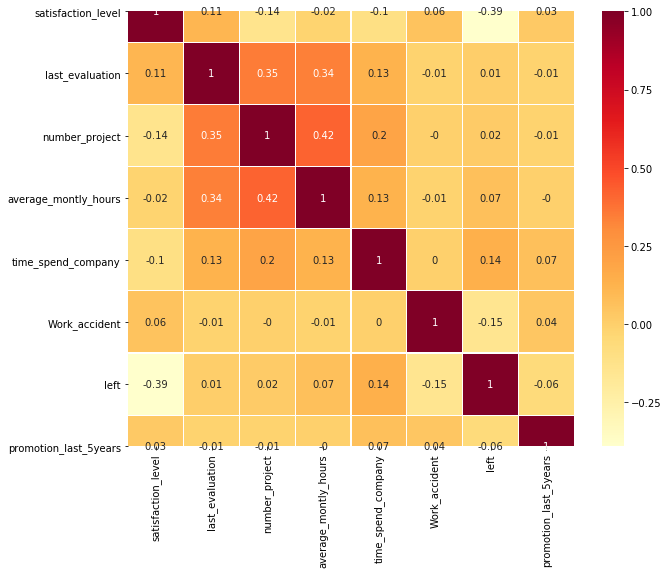

In [18]:
sns.heatmap(corr_,annot=True,cmap='YlOrRd',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Из построеннной корреляционной матрицы видно, что нет сильной линейной зависимости между численными переменными датасета

 4.	Визуализировать несколько взаимосвязей между переменными

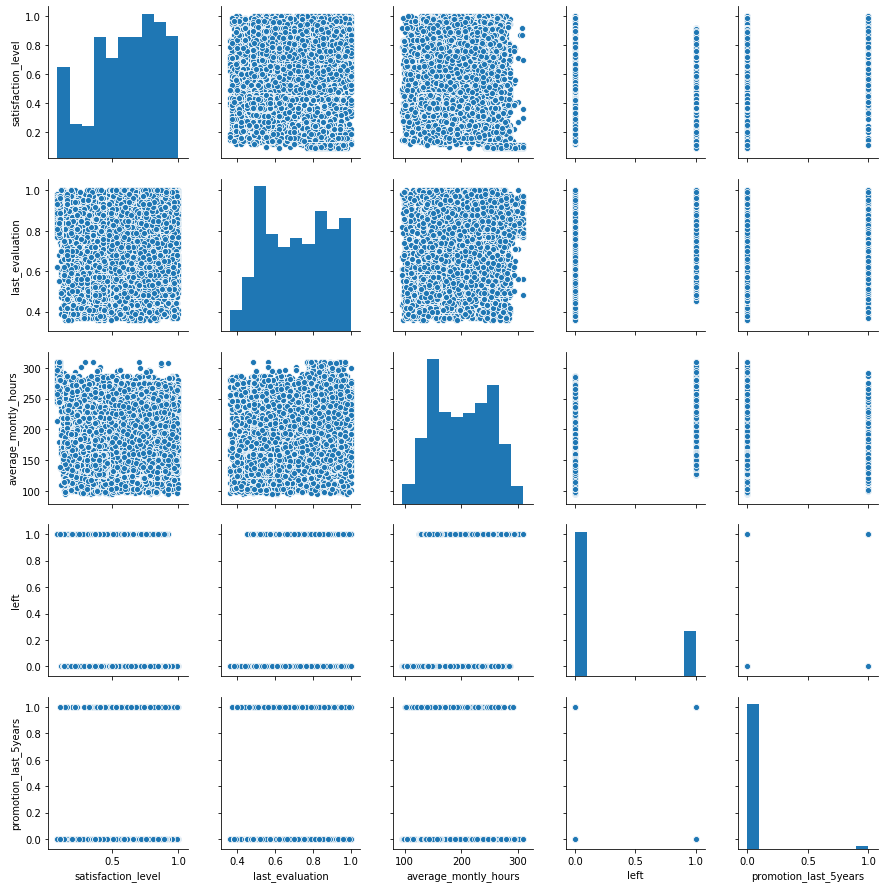

In [104]:
data_plot = sns.pairplot(data, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'left', 'promotion_last_5years'],  kind="scatter")
data_plot

 5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными

5.1. Проверяю гипотизу о том что работники, получившие повышение за последние 5 лет, и работники, неполучившие повышение, имеют одинаковый уровень удовлетовренности

In [64]:
promotion_true = data[data['promotion_last_5years'] == 1]['satisfaction_level']
promotion_false = data[data['promotion_last_5years'] == 0]['satisfaction_level']

In [65]:
statistics.variance(promotion_true), statistics.variance(promotion_false)

(0.045151710336941306, 0.06214103674956513)

In [66]:
sts.ttest_ind(promotion_true, promotion_false, equal_var=False)

Ttest_indResult(statistic=3.654528438844237, pvalue=0.00029868759793562013)

Так как полученное значение стандартной ошибки маленькое pvalue=0.00029868759793562013 и меньше заданного уровня 0.05, то гипотеза о том, что работники, получившие повышение за последние 5 лет, и работники, неполучившие повышение имеют одинаковый уровень удовлетовренности не принимается

5.2. Проверяю гипотизу о том что работники с высокой зарплатой работают в компании столько же времени, как и все остальные работники 

In [67]:
high_time_spend = data[data['salary'] == 'high']['time_spend_company']
remaining_time_spend = data[(data['salary'] == 'medium') | (data['salary'] == 'low')]['time_spend_company']

In [68]:
statistics.variance(high_time_spend), statistics.variance(remaining_time_spend)

(3.9120274806204587, 1.9685631262729706)

In [69]:
sts.ttest_ind(high_time_spend, remaining_time_spend, equal_var=False)

Ttest_indResult(statistic=3.6884064669805845, pvalue=0.00023462391346195088)

Так как полученное значение стандартной ошибки маленькое pvalue=0.00023462391346195088 и меньше заданного уровня 0.05, то гипотеза о том, что работники с высокой зарплатой работают в компании столько же времени, как и все остальные работники отвергается

5.3. Проверяю гипотезу о том, что работники, которые долго проработали в компании, имеют такой же уровень удовлетворенности, как и все остальные работники

In [70]:
long_satisfaction = data[data['time_spend_company'] > 4]['satisfaction_level']
remaining_satisfaction = data[(data['time_spend_company'] == 4) | (data['time_spend_company'] < 4)]['satisfaction_level']

In [71]:
statistics.variance(long_satisfaction), statistics.variance(remaining_satisfaction)

(0.07337277932642439, 0.059218133859261744)

In [72]:
sts.ttest_ind(long_satisfaction, remaining_satisfaction, equal_var=False)

Ttest_indResult(statistic=0.906275082371213, pvalue=0.36484747891298563)

Так как полученное значение стандартной ошибки pvalue=0.36484747891298563 больше заданного уровня 0.05, то гипотеза о том что работники, которые долго проработали в компании, имеют такой же уровень удовлетворенности, как и все остальные работники принимается

Тест Anova для трех выборок. Проверяю гипотизу о том что работники с низкой, средней и высокой зарплатой имеют одинаковый уровень удовлетворенности (т.е. уровень удовлеторенности не зависит от размера зарплаты)

In [73]:
low_satisfaction = data[data['salary'] == 'low']['satisfaction_level']
medium_satisfaction = data[data['salary'] == 'medium']['satisfaction_level']
high_satisfaction = data[data['salary'] == 'high']['satisfaction_level']
stats.f_oneway(low_satisfaction, medium_satisfaction, high_satisfaction)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

Так как полученное значение стандартной ошибки маленькое pvalue=5.967355425747657e-09 и меньше заданного уровня 0.05, то гипотеза о том, что у работников с низкой, средней и высокой зарплатой одинаковый уровень удовлетворенности не принимается

 6.	Рассчитать сколько работников работает в каждом департаменте

In [26]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

 7.	Показать распределение сотрудников по зарплатам

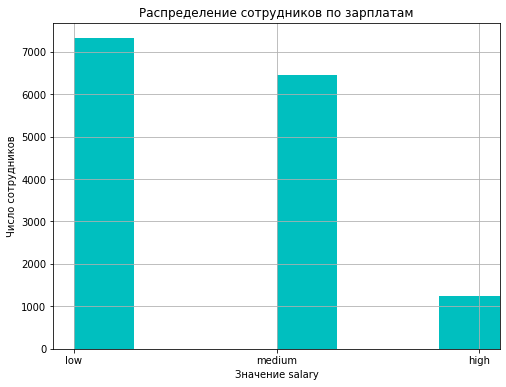

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(data['salary'], facecolor='c', width=0.3)
plt.xlabel('Значение salary')
plt.ylabel('Число сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.grid(True)
plt.show()

 8.	Показать распределение сотрудников по зарплатам совместно с департаментами

In [75]:
salary_sales = data.groupby(['sales', 'salary']).count()['Work_accident']
salary_sales

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: Work_accident, dtype: int64

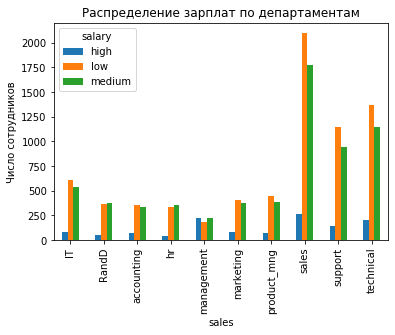

In [76]:
salary_sales.unstack().plot.bar()
plt.ylabel('Число сотрудников')
plt.title('Распределение зарплат по департаментам')
plt.show()

 9. Сколько сотрудников покинули компанию

In [77]:
n = data[data['left'] == 1]['left'].count()
print('Число работников, покинувших компанию:', n)

Число работников, покинувших компанию: 3571


 10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

10.1. Проверяю гипотезу о том, что работники, которые покинули кромпанию имели такие же последние оценки, как работники, которые остались

In [78]:
evaluation_left_1 = data[data['left'] == 1]['last_evaluation']
evaluation_left_0 = data[data['left'] == 0]['last_evaluation']

In [79]:
statistics.variance(evaluation_left_1), statistics.variance(evaluation_left_0)

(0.03907475595110629, 0.026245605925719406)

In [80]:
sts.ttest_ind(evaluation_left_1, evaluation_left_0, equal_var=False)

Ttest_indResult(statistic=0.7253423415891875, pvalue=0.46827496132319124)

Значение стандартной ошибки pvalue=0.46827496132319124 > заданного уровня 0.05 --> гипотеза принимается --> уход работника не зависит от последней оценки

10.2. Проверяю гипотезу о том, что работники, которые покинули компанию имели такие же средние часы работы в месяц, как работники, которые остались

In [81]:
hours_left_1 = data[data['left'] == 1]['average_montly_hours']
hours_left_0 = data[data['left'] == 0]['average_montly_hours']

In [82]:
statistics.variance(hours_left_1), statistics.variance(hours_left_0)

(3745.7858381437145, 2086.911926168637)

In [83]:
sts.ttest_ind(hours_left_1, hours_left_0, equal_var=False)

Ttest_indResult(statistic=7.5322885070798735, pvalue=5.907054681196632e-14)

Значение стандартной ошибки очень маленькое pvalue=5.907054681196632e-14 < заданного уровня 0.05 --> гипотеза отвергается

Строю сводную таблицу и проверяю как сотрудники покидали компанию в завимисомти от отработанных часов 

In [85]:
hours_left_pivot = data.pivot_table(index='left', columns='average_montly_hours', values='number_project', aggfunc='count', fill_value=0)
hours_left_pivot.head()

average_montly_hours,96,97,98,99,100,101,102,103,104,105,...,301,302,303,304,305,306,307,308,309,310
left,,,,,,,,,,,,,,,,,,,,,
0,6,14,23,11,19,16,17,17,28,17,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,24,8,6,17,18,18,14,20,16,18


In [86]:
sort_1 = hours_left_1.sort_values()
sort_1

12428    126
870      126
428      126
839      126
12037    126
        ... 
1228     310
1985     310
12566    310
809      310
1059     310
Name: average_montly_hours, Length: 3571, dtype: int64

In [87]:
sort_0 = hours_left_0.sort_values()
sort_0

7492      96
10020     96
9221      96
2678      96
8605      96
        ... 
6028     287
9834     287
8489     287
7757     287
2972     287
Name: average_montly_hours, Length: 11428, dtype: int64

Сотрудники с очень большим количеством средних часов в месяц покидали компанию. Сотрудники с очень маленьким количеством часов в месяц оставались в комании. Все сотрудники у кого было > 287 часов в месяц покинули компанию. Все сотрудники у к кого было < 126 часов в месяц остались в компании.

10.3. Проверяю гипотезу о том, что работники, которые покинули компанию имели такой же стаж в комании, как те работники, что остались

In [88]:
time_spend_left_1 = data[data['left'] == 1]['time_spend_company']
time_spend_left_0 = data[data['left'] == 0]['time_spend_company']

In [89]:
statistics.variance(time_spend_left_1), statistics.variance(time_spend_left_0)

(0.9558932169899603, 2.440931407076173)

In [90]:
sts.ttest_ind(time_spend_left_1, time_spend_left_0, equal_var=False)

Ttest_indResult(statistic=22.630796958073315, pvalue=1.5950778720287598e-110)

Значение стандартной ошибки очень маленькое pvalue=1.5950778720287598e-110 < заданного уровня 0.05 --> гипотеза отвергается

Строю сводную таблицу и проверяю как сотрудники покидали компанию в завимисомти от стажа

In [92]:
time_spend_pivot = data.pivot_table(index='left', columns='time_spend_company', values='number_project', aggfunc='count', fill_value=0)
time_spend_pivot.head()

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
0,3191,4857,1667,640,509,188,162,214
1,53,1586,890,833,209,0,0,0


In [93]:
# вычиляю долю (в %) ушедших сотрудников для каждого значения стажа
time_spend_company_left = time_spend_pivot.loc[1] / data['time_spend_company'].value_counts() * 100
time_spend_company_left.sort_values(ascending=False)

5     56.551256
4     34.806414
6     29.108635
3     24.615862
2      1.633785
10     0.000000
8      0.000000
7      0.000000
dtype: float64

Сотрудники, проработавшие больше 7 лет не покидали команию. Наибольший процент ушедших сотрудников был у сотрудников, которые проработали в компании 5 лет.

10.4. Проверяю гипотезу о том, что работники, которые покинули компанию имели такой же уровень удовлетворенности, как те работники, что остались

In [103]:
satisfaction_left_1 = data[data['left'] == 1]['satisfaction_level']
satisfaction_left_0 = data[data['left'] == 0]['satisfaction_level']

In [104]:
statistics.variance(satisfaction_left_1), statistics.variance(satisfaction_left_0)

(0.06966085873834273, 0.047134040226558455)

In [105]:
sts.ttest_ind(satisfaction_left_1, satisfaction_left_0, equal_var=False)

Ttest_indResult(statistic=-46.63641435277572, pvalue=0.0)

Значение стандартной ошибки pvalue=0.0 < заданного уровня 0.05 --> гипотеза отвергается

Строю сводную таблицу и проверяю как сотрудники покидали компанию в завимисомти от уровня удовлетворенности

In [106]:
satisfaction_pivot = data.pivot_table(index='left', columns='satisfaction_level', values='number_project', aggfunc='count', fill_value=0)
satisfaction_pivot.head()

satisfaction_level,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
left,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,26,51,63,73,78,67,63,...,181,178,169,167,181,203,176,183,172,111
1,195,358,335,4,3,10,3,1,5,0,...,43,20,0,0,0,0,0,0,0,0


In [107]:
satisfaction_left_1.sort_values()

1785     0.09
12517    0.09
12527    0.09
12528    0.09
528      0.09
         ... 
1409     0.92
191      0.92
14442    0.92
12191    0.92
940      0.92
Name: satisfaction_level, Length: 3571, dtype: float64

In [108]:
satisfaction_left_0.sort_values()

3202     0.12
9282     0.12
3128     0.12
11068    0.12
2370     0.12
         ... 
11122    1.00
3907     1.00
11072    1.00
10174    1.00
5466     1.00
Name: satisfaction_level, Length: 11428, dtype: float64

Сотрудники с очень низким уровнем удовлетворенности покидали компанию. Сотрудники с очень высоким уровнем удовлетворенности оставались в компании. Все сотрудники у кого был уровень удовлетворенности < 0.12 покинули компанию. Все сотрудники у к кого был уровень удовлетворенности > 0.92 остались в компании.

10.5. Проверяю гипотизу о том, что работники с низкой, средней и высокой зарплатой одинаково покидают компанию

In [109]:
low_salary_left = data[data['salary'] == 'low']['left']
medium_salary_left = data[data['salary'] == 'medium']['left']
high_salary_left = data[data['salary'] == 'high']['left']
stats.f_oneway(low_salary_left, medium_salary_left, high_salary_left)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

Значение стандартной ошибки pvalue=1.4608629258860592e-84 < заданного уровня 0.05 --> гипотеза отвергается

Строю сводную таблицу и проверяю как сотрудники покидали компанию в завимисомти от уровня зарплаты

In [24]:
promotion_pivot = data.pivot_table(index='left', columns='salary', values='number_project', aggfunc='count', fill_value=0)
promotion_pivot.head()

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


Среди сотрудников, которые покинули команию чаще были сотрудники с низкой зарплатой. Самый высокий процент ушедших сотрудников был среди сотрудников с низкой зарплатой.

Смотрю другие признаки

In [110]:
promotion_pivot = data.pivot_table(index='left', columns='promotion_last_5years', values='number_project', aggfunc='count', fill_value=0)
promotion_pivot.head()

promotion_last_5years,0,1
left,,
0,11128,300
1,3552,19


Среди сотрудников, которые покинули команию чаще были сотрудники, которых не повысили за последние 5 лет

In [111]:
promotion_pivot = data.pivot_table(index='left', columns='sales', values='number_project', aggfunc='count', fill_value=0)
promotion_pivot.head()

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


In [37]:
# считаю долю ушедших сотрудников в каждом департаменте
departament_share_left = promotion_pivot.loc[1] / data['sales'].value_counts() * 100
departament_share_left.sort_values(ascending=False)

hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
dtype: float64

Наибольший процент ухода сотрудников был в hr департаментe